In [1]:
# @title Example 1: Query a table with SQL and magic commands
# Running this code will query a table in BigQuery and download
# the results to a Pandas DataFrame named `results`.
# Learn more here: https://cloud.google.com/bigquery/docs/visualize-jupyter

%%bigquery results --project enter-universes
SELECT * FROM `enter-universes.graph_to_agent_adjacency_matrices.20231117163236`

# SELECT * FROM `enter-universes.graph_to_agent_adjacency_matrices.20231114115221_2`

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
# !gcloud config set project enter-universes


Updated property [core/project].


In [ ]:
# You can view the resulting Pandas DataFrame and work with using the Pandas library.
# https://pandas.pydata.org/docs/getting_started/index.html#getting-started
results

,node_id,07537a68-1c7e-4edb-a72f-2d82015c490f,1cc45118-72ee-4efe-95d8-06e8c02fb4c0,2e419e7e-a540-4c9a-af4e-5110e54fad96,757e7439-08f8-4cea-afac-c25b01167d32,c7d1c0a4-6365-44d6-be0c-bd3fc5436b85,eac6de73-9726-43b7-9441-f8e319a972e6,copied-1699797991293-eac6de73-9726-43b7-9441-f8e319a972e6,copied-1699889663524-copied-1699797991293-c7d1c0a4-6365-44d6-be0c-bd3fc5436b85,copied-1699889663524-copied-1699797991293-07537a68-1c7e-4edb-a72f-2d82015c490f,copied-1699889663524-copied-1699797991293-1cc45118-72ee-4efe-95d8-06e8c02fb4c0,copied-1699889663524-copied-1699797991293-2e419e7e-a540-4c9a-af4e-5110e54fad96,copied-1699889663524-copied-1699797991293-757e7439-08f8-4cea-afac-c25b01167d32,copied-1699890186553-copied-1699889663524-copied-1699797991293-eac6de73-9726-43b7-9441-f8e319a972e6,copied-1699890186553-copied-1699797991293-07537a68-1c7e-4edb-a72f-2d82015c490f,copied-1699890186553-copied-1699797991293-1cc45118-72ee-4efe-95d8-06e8c02fb4c0,copied-1699890186553-copied-1699797991293-2e419e7e-a540-4c9a-af4e-5110e54fad96,copied-1699890186553-copied-1699797991293-757e7439-08f8-4cea-afac-c25b01167d32,copied-1699890186553-copied-1699797991293-c7d1c0a4-6365-44d6-be0c-bd3fc5436b85,234ec0c2-3d02-4ef5-9fb1-7adaeb58a1b6
0,07537a68-1c7e-4edb-a72f-2d82015c490f,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1cc45118-72ee-4efe-95d8-06e8c02fb4c0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2e419e7e-a540-4c9a-af4e-5110e54fad96,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,757e7439-08f8-4cea-afac-c25b01167d32,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,c7d1c0a4-6365-44d6-be0c-bd3fc5436b85,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,eac6de73-9726-43b7-9441-f8e319a972e6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,copied-1699797991293-eac6de73-9726-43b7-9441-f...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,copied-1699889663524-copied-1699797991293-c7d1...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8,copied-1699889663524-copied-1699797991293-0753...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,copied-1699889663524-copied-1699797991293-1cc4...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
df_3 = pd.DataFrame(results).set_index("node_id")


In [ ]:
# df_3 = df_2.set_index("node_id")

In [ ]:
print(df_3.head())

                                      07537a68-1c7e-4edb-a72f-2d82015c490f  \
node_id                                                                      
07537a68-1c7e-4edb-a72f-2d82015c490f                                     0   
1cc45118-72ee-4efe-95d8-06e8c02fb4c0                                     0   
2e419e7e-a540-4c9a-af4e-5110e54fad96                                     1   
757e7439-08f8-4cea-afac-c25b01167d32                                     0   
c7d1c0a4-6365-44d6-be0c-bd3fc5436b85                                     0   

                                      1cc45118-72ee-4efe-95d8-06e8c02fb4c0  \
node_id                                                                      
07537a68-1c7e-4edb-a72f-2d82015c490f                                     0   
1cc45118-72ee-4efe-95d8-06e8c02fb4c0                                     0   
2e419e7e-a540-4c9a-af4e-5110e54fad96                                     0   
757e7439-08f8-4cea-afac-c25b01167d32                           

In [ ]:
def create_graph_from_adjacency(df):
    """
    Create a NetworkX graph from an adjacency matrix DataFrame.
    Assumes that node identifiers are in the DataFrame's index.
    """
    import networkx as nx

    # Create a graph
    G = nx.Graph()

    # Add nodes
    for node in df.index:
        G.add_node(node)

    # Add edges
    for i, row in df.iterrows():
        for j, val in row.items():
            if val != 0:  # Assuming non-zero values indicate an edge
                G.add_edge(i, j)

    return G

In [ ]:
G = create_graph_from_adjacency(df_3)  # Replace df_2 with your DataFrame variable


# Basic Analysis

## Correctly identified count of connected_components

In [ ]:
import networkx as nx

connected_components = list(nx.connected_components(G))
number_of_subgraphs = len(connected_components)

print("Number of connected components (subgraphs):", number_of_subgraphs)


Number of connected components (subgraphs): 3


In [ ]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()


In [ ]:

# Basic Graph Properties
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
is_directed = nx.is_directed(G)

print(is_directed)


False


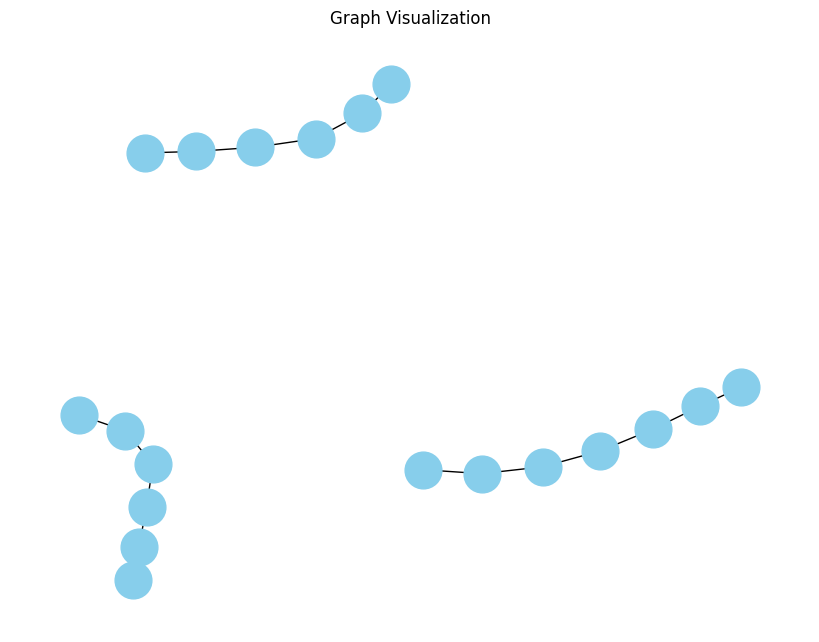

In [ ]:
# Draw the Graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=False, font_weight='bold', node_color='skyblue', node_size=700)
plt.title("Graph Visualization")
plt.show()


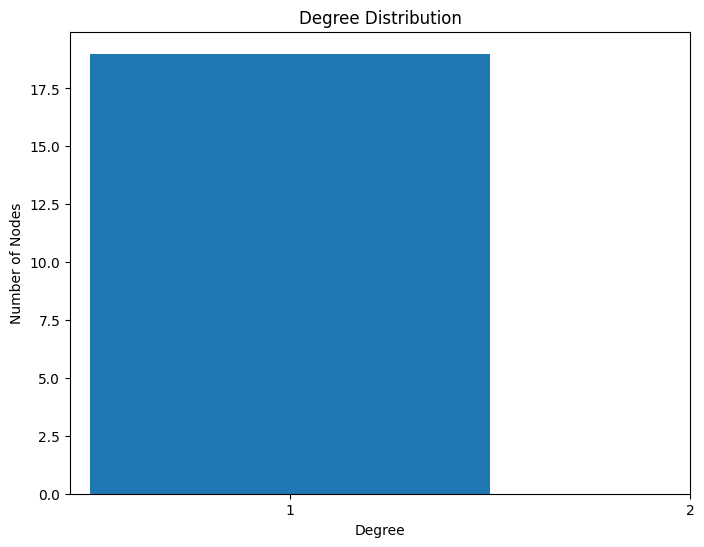

In [ ]:
# Degree Distribution
degrees = [G.degree(n) for n in G.nodes()]
plt.figure(figsize=(8, 6))
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1, 1), align='left')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.xticks(range(min(degrees), max(degrees) + 1, 1))
plt.show()

# Advanced Graph Statistics

In [ ]:


# Average Degree
average_degree = sum(degrees) / num_nodes

# Diameter of the graph
# As the graph might not be fully connected, we consider the largest connected component
largest_cc = max(nx.connected_components(G), key=len)
subgraph = G.subgraph(largest_cc)
diameter = nx.diameter(subgraph)

# Average Shortest Path Length
avg_shortest_path_length = nx.average_shortest_path_length(subgraph)

# Clustering Coefficient
clustering_coefficient = nx.average_clustering(G)

# Degree Centrality
degree_centrality = nx.degree_centrality(G)

# Display Advanced Statistics
advanced_stats = {
    "Average Degree": average_degree,
    "Diameter": diameter,
    "Average Shortest Path Length": avg_shortest_path_length,
    "Average Clustering Coefficient": clustering_coefficient,
    "Degree Centrality": degree_centrality
}

advanced_stats



{'Average Degree': 1.6842105263157894,
 'Diameter': 6,
 'Average Shortest Path Length': 2.6666666666666665,
 'Average Clustering Coefficient': 0.0,
 'Degree Centrality': {'07537a68-1c7e-4edb-a72f-2d82015c490f': 0.1111111111111111,
  '1cc45118-72ee-4efe-95d8-06e8c02fb4c0': 0.1111111111111111,
  '2e419e7e-a540-4c9a-af4e-5110e54fad96': 0.1111111111111111,
  '757e7439-08f8-4cea-afac-c25b01167d32': 0.1111111111111111,
  'c7d1c0a4-6365-44d6-be0c-bd3fc5436b85': 0.05555555555555555,
  'eac6de73-9726-43b7-9441-f8e319a972e6': 0.05555555555555555,
  'copied-1699797991293-eac6de73-9726-43b7-9441-f8e319a972e6': 0.05555555555555555,
  'copied-1699889663524-copied-1699797991293-c7d1c0a4-6365-44d6-be0c-bd3fc5436b85': 0.05555555555555555,
  'copied-1699889663524-copied-1699797991293-07537a68-1c7e-4edb-a72f-2d82015c490f': 0.1111111111111111,
  'copied-1699889663524-copied-1699797991293-1cc45118-72ee-4efe-95d8-06e8c02fb4c0': 0.1111111111111111,
  'copied-1699889663524-copied-1699797991293-2e419e7e-a540-4

# Decode Pairs, layer matrix


1.   Identify based on user-content-system-content-user-content, agent-layer
2.   Identify based on @variabel_{1..n}, inerhitance-version-layer



In [ ]:
# 20231114181549

In [ ]:
%%bigquery df_edges --project enter-universes

SELECT * FROM `enter-universes.graph_to_agent.edges_table` where graph_id = "20231117163236"

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
%%bigquery df_nodes --project enter-universes

SELECT * FROM `enter-universes.graph_to_agent.nodes_table` where graph_id = "20231117163236"

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
df_edges.head()

,graph_id,from,to
0,20231117163236,07537a68-1c7e-4edb-a72f-2d82015c490f,757e7439-08f8-4cea-afac-c25b01167d32
1,20231117163236,07537a68-1c7e-4edb-a72f-2d82015c490f,757e7439-08f8-4cea-afac-c25b01167d32
2,20231117163236,1cc45118-72ee-4efe-95d8-06e8c02fb4c0,2e419e7e-a540-4c9a-af4e-5110e54fad96
3,20231117163236,1cc45118-72ee-4efe-95d8-06e8c02fb4c0,2e419e7e-a540-4c9a-af4e-5110e54fad96
4,20231117163236,234ec0c2-3d02-4ef5-9fb1-7adaeb58a1b6,copied-1699890186553-copied-1699889663524-copi...


In [ ]:
print(df_nodes.head())

         graph_id                                                 id label
0  20231117163236               757e7439-08f8-4cea-afac-c25b01167d32  user
1  20231117163236               757e7439-08f8-4cea-afac-c25b01167d32  user
2  20231117163236               c7d1c0a4-6365-44d6-be0c-bd3fc5436b85  user
3  20231117163236               c7d1c0a4-6365-44d6-be0c-bd3fc5436b85  user
4  20231117163236  copied-1699889663524-copied-1699797991293-757e...  user


In [ ]:
df_nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   graph_id  38 non-null     object
 1   id        38 non-null     object
 2   label     38 non-null     object
dtypes: object(3)
memory usage: 1.0+ KB


# Get string layer across adjaceny matrix

In [ ]:
import pandas as pd
import networkx as nx

# Adding labels to the nodes
label_dict = df_nodes.set_index('id')['label'].to_dict()
nx.set_node_attributes(G, label_dict, 'label')


In [ ]:
def find_pattern_in_subgraph(subgraph):
    count = 0
    for node in subgraph.nodes:
        # Check if the node has the label 'user' and has neighbors
        if subgraph.nodes[node]['label'] == 'user' and subgraph.neighbors(node):
            for neighbor in subgraph.neighbors(node):
                # Check the sequence: 'user' -> 'some string' -> 'system'
                if subgraph.nodes[neighbor]['label'] != 'user' and subgraph.nodes[neighbor]['label'] != 'system':
                    for second_neighbor in subgraph.neighbors(neighbor):
                        if subgraph.nodes[second_neighbor]['label'] == 'system':
                            count += 1
    return count

# Applying the function to each subgraph
total_pattern_count = 0
for component in nx.connected_components(G):
    print(component)
    subgraph = G.subgraph(component)
    print(subgraph)
    total_pattern_count += find_pattern_in_subgraph(subgraph)

print("Total count of specific patterns in all subgraphs:", total_pattern_count)


{'eac6de73-9726-43b7-9441-f8e319a972e6', 'c7d1c0a4-6365-44d6-be0c-bd3fc5436b85', '757e7439-08f8-4cea-afac-c25b01167d32', '2e419e7e-a540-4c9a-af4e-5110e54fad96', '1cc45118-72ee-4efe-95d8-06e8c02fb4c0', '07537a68-1c7e-4edb-a72f-2d82015c490f'}
Graph with 6 nodes and 5 edges
{'copied-1699890186553-copied-1699797991293-757e7439-08f8-4cea-afac-c25b01167d32', 'copied-1699890186553-copied-1699797991293-c7d1c0a4-6365-44d6-be0c-bd3fc5436b85', 'copied-1699890186553-copied-1699797991293-2e419e7e-a540-4c9a-af4e-5110e54fad96', 'copied-1699890186553-copied-1699797991293-1cc45118-72ee-4efe-95d8-06e8c02fb4c0', 'copied-1699890186553-copied-1699797991293-07537a68-1c7e-4edb-a72f-2d82015c490f', 'copied-1699797991293-eac6de73-9726-43b7-9441-f8e319a972e6'}
Graph with 6 nodes and 5 edges
{'copied-1699889663524-copied-1699797991293-1cc45118-72ee-4efe-95d8-06e8c02fb4c0', 'copied-1699890186553-copied-1699889663524-copied-1699797991293-eac6de73-9726-43b7-9441-f8e319a972e6', 'copied-1699889663524-copied-1699797991

# sudoku on a matrix

In [ ]:
import networkx as nx

class GraphPatternProcessor:
    def __init__(self, graph, num_steps):
        self.graph = graph
        self.num_steps = num_steps

    def process_graph(self):
        """Main method to process the graph."""
        user_nodes = [node for node, attrs in self.graph.nodes(data=True) if attrs['label'] == 'user']
        for start_node in user_nodes:
            for path in self.explore_paths(start_node, steps=self.num_steps):
                self.check_and_print_gpt_call(path)

    def explore_paths(self, start_node, steps):
        """Explore all paths up to a certain number of steps from a start node."""
        paths = []
        self.dfs(start_node, [], steps, paths)
        return paths

    def dfs(self, node, path, steps, paths):
        """Depth-first search to explore paths."""
        if steps == 0 or node in path:
            return
        path.append(node)
        if len(path) == steps + 1:
            paths.append(path.copy())
        else:
            for neighbor in self.graph.neighbors(node):
                self.dfs(neighbor, path, steps - 1, paths)
        path.pop()

    def check_and_print_gpt_call(self, path):
        """Check if the path matches the blueprint pattern and print the GPT call."""
        labels = [self.graph.nodes[node]['label'] for node in path]
        if self.is_valid_blueprint(labels):
            gpt_call = {
                "model": "gpt-4",
                "messages": [
                    {"role": "user", "content": labels[1]},
                    {"role": "system", "content": labels[3]},
                    {"role": "user", "content": labels[5]}
                ]
            }
            print("GPT Call:", gpt_call)
        else:
            print("Blueprint pattern not found in this path.")

    def is_valid_blueprint(self, labels):
        """Check if labels sequence matches the blueprint pattern."""
        return (len(labels) == 6 and labels[0] == 'user' and labels[2] == 'system' and labels[4] == 'user' and
                all(label not in ['user', 'system'] for label in [labels[1], labels[3], labels[5]]))



# v2 soduku on matrix

## for inheritance

In [ ]:
import networkx as nx
from google.cloud import bigquery
import re
from collections import defaultdict


class VariableConnectedComponentsProcessor:
    def __init__(self, graph):
        self.graph = graph
        self.bq_client = bigquery.Client()

    def process_graph(self):
        """Process the graph to find connected components with @variable nodes."""
        variable_nodes = self.find_variable_nodes()
        connected_components_with_variables = self.find_connected_components_with_variables(variable_nodes)
        for component in connected_components_with_variables:
            print("Connected Component containing @variable node:", list(component))

    def find_variable_nodes(self):
        """Find all @variable nodes."""
        variable_nodes = set()
        query = """
        SELECT * FROM `enter-universes.graph_to_agent.nodes_table`
        WHERE graph_id = "20231114181549" AND STARTS_WITH(label, "@")
        """
        query_job = self.bq_client.query(query)
        results = query_job.result()
        for row in results:
            node_id = row['id']
            variable_nodes.add(node_id)
        return variable_nodes

    def find_connected_components_with_variables(self, variable_nodes):
        """Find connected components that contain @variable nodes."""
        components_with_variables = []
        for component in nx.connected_components(self.graph):
            if any(node in variable_nodes for node in component):
                components_with_variables.append(component)
        return components_with_variables

    def organize_components_by_variable_suffix(self):
        """Organize connected components based on @variable suffixes."""
        variable_nodes = self.find_variable_nodes()
        connected_components = self.find_connected_components_with_variables(variable_nodes)
        components_dict = defaultdict(list)

        for component in connected_components:
            for node in component:
                if node in variable_nodes:
                    label = self.graph.nodes[node]['label']
                    variable_suffix = self.extract_variable_suffix(label)
                    if variable_suffix:
                        components_dict[variable_suffix].append(node)

        # Sorting the dictionary by variable suffixes
        ordered_components_dict = dict(sorted(components_dict.items(), key=lambda x: x[0]))

        for suffix, nodes in ordered_components_dict.items():
            print(f"Connected Component for @variable_{suffix}:", nodes)

    def extract_variable_suffix(self, label):
        """Extract the variable suffix from the label."""
        match = re.search(r"@(\w+_\d+_\d+)", label)
        return match.group(1) if match else None





In [ ]:
  import networkx as nx

class GraphPatternProcessor(VariableConnectedComponentsProcessor):
    def __init__(self, graph, num_steps):
        self.graph = graph
        self.num_steps = num_steps
        self.bq_client = bigquery.Client()

    def process_graph(self):
        """Main method to process the graph."""
        user_nodes = [node for node, attrs in self.graph.nodes(data=True) if attrs['label'] == 'user']
        for start_node in user_nodes:
            for path in self.explore_paths(start_node, steps=self.num_steps):
                self.check_and_print_gpt_call(path)

    def explore_paths(self, start_node, steps):
        """Explore all paths up to a certain number of steps from a start node."""
        paths = []
        self.dfs(start_node, [], steps, paths)
        return paths

    def dfs(self, node, path, steps, paths):
        """Depth-first search to explore paths."""
        if steps == 0 or node in path:
            return
        path.append(node)
        if len(path) == steps + 1:
            paths.append(path.copy())
        else:
            for neighbor in self.graph.neighbors(node):
                self.dfs(neighbor, path, steps - 1, paths)
        path.pop()

    # def check_and_print_gpt_call(self, path):
    #     """Check if the path matches the blueprint pattern and print the GPT call."""
    #     labels = [self.graph.nodes[node]['label'] for node in path]
    #     if self.is_valid_blueprint(labels):
    #         gpt_call = {
    #             "model": "gpt-4",
    #             "messages": [
    #                 {"role": "user", "content": labels[1]},
    #                 {"role": "system", "content": labels[3]},
    #                 {"role": "user", "content": labels[5]}
    #             ]
    #         }
    #         print("GPT Call:", gpt_call)
    #     else:
    #         print("Blueprint pattern not found in this path.")

    def is_valid_blueprint(self, labels):
        """Check if labels sequence matches the blueprint pattern."""
        return (len(labels) == 6 and labels[0] == 'user' and labels[2] == 'system' and labels[4] == 'user' and
                all(label not in ['user', 'system'] for label in [labels[1], labels[3], labels[5]]))


    def save_gpt_calls_to_jsonl(self, file_path, graph_id):
        """Save GPT calls to a JSON Lines file with additional UUID and graph_id."""
        with open(file_path, 'w') as file:
            user_nodes = [node for node, attrs in self.graph.nodes(data=True) if attrs['label'] == 'user']
            for start_node in user_nodes:
                # Generate a UUID for each component path
                path_uuid = str(uuid.uuid4())
                for path in self.explore_paths(start_node, steps=self.num_steps):
                    gpt_call, is_valid = self.generate_gpt_call_json(path, path_uuid, graph_id)
                    if is_valid:
                        json_line = json.dumps(gpt_call)
                        file.write(json_line + '\n')

    def generate_gpt_call_json(self, path, path_uuid, graph_id):
        """Generate a JSON representation of a GPT call with UUID and graph_id."""
        labels = [self.graph.nodes[node]['label'] for node in path]
        if self.is_valid_blueprint(labels):
            gpt_call_json = {
                "path": path,
                "gpt_call": {
                    "model": "gpt-4",
                    "messages": [
                        {"role": "user", "content": labels[1]},
                        {"role": "system", "content": labels[3]},
                        {"role": "user", "content": labels[5]}
                    ]
                },
                "answer_node": {
                    "node_id": f"answer_{path[-1]}",
                    "label": self.get_answer_label(path)
                },
                "uuid": path_uuid,
                "graph_id": graph_id
            }
            return gpt_call_json, True
        return {}, False


    def get_answer_label(self, path):
        """Get the label for the answer node, considering @variable terms."""
        # Find @variable nodes
        variable_nodes = self.find_variable_nodes()
        components_with_variables = self.find_connected_components_with_variables(variable_nodes)

        # Check if any node in the path is part of a connected component with @variables
        for component in components_with_variables:
            if any(node in path for node in component):
                for node in component:
                    if node in variable_nodes:
                        return self.graph.nodes[node]['label']

        return "None"


    def dump_to_bigquery(self, file_path, dataset_name, table_name):
        """Upload the JSONL data to BigQuery."""
        client = bigquery.Client()
        table_id = f"{client.project}.{dataset_name}.{table_name}"

        # Configure the load job
        job_config = bigquery.LoadJobConfig(
            source_format=bigquery.SourceFormat.NEWLINE_DELIMITED_JSON,
            autodetect=True
        )

        # Load the JSONL file to BigQuery
        with open(file_path, "rb") as source_file:
            job = client.load_table_from_file(source_file, table_id, job_config=job_config)

        # Wait for the load job to complete
        job.result()

        print(f"Uploaded {file_path} to {table_id}")


In [ ]:
graph_processor = GraphPatternProcessor(G, 10)

In [ ]:
import json
import uuid

In [ ]:
graph_processor.save_gpt_calls_to_jsonl('3_test_20231120.jsonl', '20231117163236')

In [ ]:
# enter-universes.graph_to_agent_chat_completions.test_2

%%bigquery chats --project enter-universes
SELECT * FROM `enter-universes.graph_to_agent_chat_completions.test_2`


Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
chats

,graph_id,uuid,answer_node,gpt_call,path
0,20231117163236,28d27e3c-e2f3-4bb6-b12b-494c7f59986e,"{'label': '@variable_1_2', 'node_id': 'answer_...",{'messages': [{'content': 'The following is a ...,"[c7d1c0a4-6365-44d6-be0c-bd3fc5436b85, 1cc4511..."
1,20231117163236,8262cd2c-c5e5-4ad1-a418-0217131aba70,"{'label': '@varibale_1_1', 'node_id': 'answer_...",{'messages': [{'content': 'You're agent-'Deduc...,[copied-1699889663524-copied-1699797991293-c7d...
2,20231117163236,15deb01e-50ec-44d0-a87b-05b574752570,"{'label': 'None', 'node_id': 'answer_copied-16...",{'messages': [{'content': 'You're an expert in...,[copied-1699890186553-copied-1699797991293-c7d...


In [ ]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.3/220.3 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


# best guess for now

In [ ]:
import re
import openai  # Assuming you're using the OpenAI API

class GPTVariableProcessor:
    def __init__(self, data):
        self.data = data  # Data loaded from BigQuery

    def process_data(self):
        for record in self.data:
            answer_label = record['answer_node']['label']

            if self.contains_variable(answer_label):
                lowest_variable = self.find_lowest_variable(answer_label)
                response = self.make_gpt_call(record['gpt_call'])
                self.update_record(record, lowest_variable, response)

            elif 'gpt_call' in record:
                response = self.make_gpt_call(record['gpt_call'])
                record['answer_node']['label'] = response

    def contains_variable(self, label):
        return '@variable' in label

    def find_lowest_variable(self, label):
        variables = re.findall(r'@variable_\d+_\d+', label)
        return min(variables, key=lambda x: [int(num) for num in x.split('_')[1:]])

    def make_gpt_call(self, gpt_call_data):
        # You will need to implement the logic to construct the prompt
        # and call the GPT API here.
        # For example:
        prompt = self.construct_prompt(gpt_call_data)
        response = openai.Completion.create(prompt=prompt, model=gpt_call_data['model'])
        return response.choices[0].text.strip()

    def construct_prompt(self, gpt_call_data):
        # Construct the GPT prompt based on gpt_call_data
        # This is just a placeholder function
        return "\n".join([msg['content'] for msg in gpt_call_data['messages']])

    def update_record(self, record, variable, response):
        record['answer_node']['label'] = record['answer_node']['label'].replace(variable, response)
        for msg in record['gpt_call']['messages']:
            msg['content'] = msg['content'].replace(variable, response)

        # Now handle the next higher variable
        next_variable = self.get_next_higher_variable(variable)
        if next_variable:
            record['gpt_call']['messages'][-1]['content'] = next_variable  # Assuming last message needs to be updated
            next_response = self.make_gpt_call(record['gpt_call'])
            self.update_record(record, next_variable, next_response)

    def get_next_higher_variable(self, variable):
        # Implement logic to find the next higher variable
        # This is just a placeholder function
        return None



In [ ]:
# Example Usage
processor = GPTVariableProcessor(chats)
processor.process_data()
# Now, data is processed and can be updated back to BigQuery


TypeError: ignored

# Lets take baby steps

In [ ]:
%%bigquery none_chats --project enter-universes

SELECT
  uuid,
  message.content,
  message.role,
  answer_node.label
FROM
  `enter-universes.graph_to_agent_chat_completions.test_2`,
  UNNEST(gpt_call.messages) AS message
WHERE
  answer_node.label = 'None'

Query is running:   0%|          |

Downloading:   0%|          |

## Correct gpt_blueprint query

In [ ]:
%%bigquery v2_none_chats --project enter-universes

SELECT
  gc.graph_id,
  gc.uuid,
  gc.answer_node.label AS answer_label,
  gc.answer_node.node_id AS answer_node_id,
  message.content,
  message.role,
  gc.gpt_call.model
FROM
  `enter-universes.graph_to_agent_chat_completions.test_2` gc,
  UNNEST(gpt_call.messages) as message
WHERE
  CAST(gc.graph_id AS STRING) = '20231117163236'


Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
data = v2_none_chats

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   graph_id        9 non-null      Int64 
 1   uuid            9 non-null      object
 2   answer_label    9 non-null      object
 3   answer_node_id  9 non-null      object
 4   content         9 non-null      object
 5   role            9 non-null      object
 6   model           9 non-null      object
dtypes: Int64(1), object(6)
memory usage: 641.0+ bytes


In [ ]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.3/220.3 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


In [46]:
import pandas as pd
import requests
import os
import pandas as pd
import requests
import os
import re
from collections import defaultdict

# Assuming 'data' is your DataFrame

# Set up API key and URL
openai_api_key = '************************'
open_ai_url = "https://api.openai.com/v1/chat/completions"

headers = {
    'Content-Type': 'application/json',
    'Authorization': f'Bearer {openai_api_key}'
}

In [ ]:


# Group the DataFrame by 'uuid'
grouped = data.groupby('uuid')
print(grouped)

# Process each GPT call
for uuid, group in grouped:
    # Sort the group by index to maintain the sequence
    sorted_group = group.sort_index()
    print(sorted_group)
    # Construct the GPT call in the required format
    messages = [{"role": row["role"], "content": row["content"]} for index, row in sorted_group.iterrows()]
    request_data = {
        "model": sorted_group.iloc[0]['model'],
        "messages": messages
    }

    response = requests.post(open_ai_url, headers=headers, json=request_data)
    response_json = response.json()

    print(response_json)

    # Extract the response content
    # The last message from the assistant is assumed to be the response we want
    last_message = None
    for choice in response_json.get("choices", []):
        if choice.get("message", {}).get("role") == "assistant":
            last_message = choice.get("message", {}).get("content")

    if last_message:
        # Update the DataFrame with the new answer_label for the last message
        last_index = sorted_group.index[-1]
        data.at[last_index, 'answer_label'] = last_message
    else:
        print(f"No assistant response found for UUID: {uuid}")


         graph_id                                  uuid answer_label  \
6  20231117163236  15deb01e-50ec-44d0-a87b-05b574752570         None   
7  20231117163236  15deb01e-50ec-44d0-a87b-05b574752570         None   
8  20231117163236  15deb01e-50ec-44d0-a87b-05b574752570         None   

                                      answer_node_id  \
6  answer_copied-1699797991293-eac6de73-9726-43b7...   
7  answer_copied-1699797991293-eac6de73-9726-43b7...   
8  answer_copied-1699797991293-eac6de73-9726-43b7...   

                                             content    role  \
6  You're an expert in mermeid .mmd and you nedd ...    user   
7         Understood! I will review following .mmd\n  system   
8  sequenceDiagram\nAlice->>John: Hello John, how...    user   

                    model  
6  gpt-3.5-turbo-16k-0613  
7  gpt-3.5-turbo-16k-0613  
8  gpt-3.5-turbo-16k-0613  
{'id': 'chatcmpl-8N8gPXJmuQIAxF0kqnZQtysr6Jy5C', 'object': 'chat.completion', 'created': 1700525613, 'model': 'gpt-3.

In [ ]:
data

,graph_id,uuid,answer_label,answer_node_id,content,role,model
0,20231117163236,28d27e3c-e2f3-4bb6-b12b-494c7f59986e,@variable_1_2,answer_eac6de73-9726-43b7-9441-f8e319a972e6,The following is a .puml content generated by ...,user,gpt-3.5-turbo-16k-0613
1,20231117163236,28d27e3c-e2f3-4bb6-b12b-494c7f59986e,@variable_1_2,answer_eac6de73-9726-43b7-9441-f8e319a972e6,Understood! As I'm an expert in the .puml synt...,system,gpt-3.5-turbo-16k-0613
2,20231117163236,28d27e3c-e2f3-4bb6-b12b-494c7f59986e,The variable_1_2 should be defined as a class ...,answer_eac6de73-9726-43b7-9441-f8e319a972e6,@variable_1_2,user,gpt-3.5-turbo-16k-0613
3,20231117163236,8262cd2c-c5e5-4ad1-a418-0217131aba70,@varibale_1_1,answer_copied-1699890186553-copied-16998896635...,You're agent-'Deductive Reasoning'. You're one...,user,gpt-3.5-turbo-16k-0613
4,20231117163236,8262cd2c-c5e5-4ad1-a418-0217131aba70,@varibale_1_1,answer_copied-1699890186553-copied-16998896635...,"Understood! , I'm agent-'Deductive Reasoning',...",system,gpt-3.5-turbo-16k-0613
5,20231117163236,8262cd2c-c5e5-4ad1-a418-0217131aba70,"Based on the given problem-space, I will attem...",answer_copied-1699890186553-copied-16998896635...,How would you model following problem-space?: ...,user,gpt-3.5-turbo-16k-0613
6,20231117163236,15deb01e-50ec-44d0-a87b-05b574752570,None,answer_copied-1699797991293-eac6de73-9726-43b7...,You're an expert in mermeid .mmd and you nedd ...,user,gpt-3.5-turbo-16k-0613
7,20231117163236,15deb01e-50ec-44d0-a87b-05b574752570,None,answer_copied-1699797991293-eac6de73-9726-43b7...,Understood! I will review following .mmd\n,system,gpt-3.5-turbo-16k-0613
8,20231117163236,15deb01e-50ec-44d0-a87b-05b574752570,The provided .mmd file seems to be an example ...,answer_copied-1699797991293-eac6de73-9726-43b7...,"sequenceDiagram\nAlice->>John: Hello John, how...",user,gpt-3.5-turbo-16k-0613


In [58]:
%%bigquery data --project enter-universes

SELECT
  gc.graph_id,
  gc.uuid,
  gc.answer_node.label AS answer_label,
  gc.answer_node.node_id AS answer_node_id,
  message.content,
  message.role,
  gc.gpt_call.model
FROM
  `enter-universes.graph_to_agent_chat_completions.test_2` gc,
  UNNEST(gpt_call.messages) as message
WHERE
  CAST(gc.graph_id AS STRING) = '20231117163236'

Query is running:   0%|          |

Downloading:   0%|          |

In [3]:
data

,graph_id,uuid,answer_label,answer_node_id,content,role,model
0,20231117163236,28d27e3c-e2f3-4bb6-b12b-494c7f59986e,@variable_1_2,answer_eac6de73-9726-43b7-9441-f8e319a972e6,The following is a .puml content generated by ...,user,gpt-3.5-turbo-16k-0613
1,20231117163236,28d27e3c-e2f3-4bb6-b12b-494c7f59986e,@variable_1_2,answer_eac6de73-9726-43b7-9441-f8e319a972e6,Understood! As I'm an expert in the .puml synt...,system,gpt-3.5-turbo-16k-0613
2,20231117163236,28d27e3c-e2f3-4bb6-b12b-494c7f59986e,@variable_1_2,answer_eac6de73-9726-43b7-9441-f8e319a972e6,@variable_1_2,user,gpt-3.5-turbo-16k-0613
3,20231117163236,8262cd2c-c5e5-4ad1-a418-0217131aba70,@varibale_1_1,answer_copied-1699890186553-copied-16998896635...,You're agent-'Deductive Reasoning'. You're one...,user,gpt-3.5-turbo-16k-0613
4,20231117163236,8262cd2c-c5e5-4ad1-a418-0217131aba70,@varibale_1_1,answer_copied-1699890186553-copied-16998896635...,"Understood! , I'm agent-'Deductive Reasoning',...",system,gpt-3.5-turbo-16k-0613
5,20231117163236,8262cd2c-c5e5-4ad1-a418-0217131aba70,@varibale_1_1,answer_copied-1699890186553-copied-16998896635...,How would you model following problem-space?: ...,user,gpt-3.5-turbo-16k-0613
6,20231117163236,15deb01e-50ec-44d0-a87b-05b574752570,None,answer_copied-1699797991293-eac6de73-9726-43b7...,You're an expert in mermeid .mmd and you nedd ...,user,gpt-3.5-turbo-16k-0613
7,20231117163236,15deb01e-50ec-44d0-a87b-05b574752570,None,answer_copied-1699797991293-eac6de73-9726-43b7...,Understood! I will review following .mmd\n,system,gpt-3.5-turbo-16k-0613
8,20231117163236,15deb01e-50ec-44d0-a87b-05b574752570,None,answer_copied-1699797991293-eac6de73-9726-43b7...,"sequenceDiagram\nAlice->>John: Hello John, how...",user,gpt-3.5-turbo-16k-0613


## get uuid and var ordered

In [12]:
df = data

,graph_id,uuid,answer_label,answer_node_id,content,role,model
0,20231117163236,28d27e3c-e2f3-4bb6-b12b-494c7f59986e,@variable_1_2,answer_eac6de73-9726-43b7-9441-f8e319a972e6,The following is a .puml content generated by ...,user,gpt-3.5-turbo-16k-0613
1,20231117163236,28d27e3c-e2f3-4bb6-b12b-494c7f59986e,@variable_1_2,answer_eac6de73-9726-43b7-9441-f8e319a972e6,Understood! As I'm an expert in the .puml synt...,system,gpt-3.5-turbo-16k-0613
2,20231117163236,28d27e3c-e2f3-4bb6-b12b-494c7f59986e,@variable_1_2,answer_eac6de73-9726-43b7-9441-f8e319a972e6,@variable_1_2,user,gpt-3.5-turbo-16k-0613
3,20231117163236,8262cd2c-c5e5-4ad1-a418-0217131aba70,@varibale_1_1,answer_copied-1699890186553-copied-16998896635...,You're agent-'Deductive Reasoning'. You're one...,user,gpt-3.5-turbo-16k-0613
4,20231117163236,8262cd2c-c5e5-4ad1-a418-0217131aba70,@varibale_1_1,answer_copied-1699890186553-copied-16998896635...,"Understood! , I'm agent-'Deductive Reasoning',...",system,gpt-3.5-turbo-16k-0613


In [39]:
def get_sorted_variable_rows(df):
    # Filter rows with strings in the 'answer_label' column that start with '@var'
    filtered_df = df[df['answer_label'].str.startswith('@var')]

    # Extract the suffixes and sort
    filtered_df['suffix_1'] = filtered_df['answer_label'].str.extract(r'@var(?:iable|ibale)_([0-9]+)')[0].astype(int)
    filtered_df['suffix_2'] = filtered_df['answer_label'].str.extract(r'@var(?:iable|ibale)_[0-9]+_([0-9]+)')[0].astype(int)
    sorted_df = filtered_df.sort_values(by=['suffix_1', 'suffix_2'])

    # Return the ordered suffixes and uuids as a dict
    result_dict = dict(zip(sorted_df['uuid'], sorted_df['answer_label']))
    return result_dict

# Apply the function and get the result
result = get_sorted_variable_rows(df)
result

<ipython-input-39-197161258b87>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['suffix_1'] = filtered_df['answer_label'].str.extract(r'@var(?:iable|ibale)_([0-9]+)')[0].astype(int)
<ipython-input-39-197161258b87>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['suffix_2'] = filtered_df['answer_label'].str.extract(r'@var(?:iable|ibale)_[0-9]+_([0-9]+)')[0].astype(int)


{'8262cd2c-c5e5-4ad1-a418-0217131aba70': '@varibale_1_1',
 '28d27e3c-e2f3-4bb6-b12b-494c7f59986e': '@variable_1_2'}

In [55]:
result

{'8262cd2c-c5e5-4ad1-a418-0217131aba70': '@varibale_1_1',
 '28d27e3c-e2f3-4bb6-b12b-494c7f59986e': '@variable_1_2'}

In [56]:
variable_uuid_dict = result

In [59]:
df_with_content = data

In [61]:
df_with_content

,graph_id,uuid,answer_label,answer_node_id,content,role,model
0,20231117163236,28d27e3c-e2f3-4bb6-b12b-494c7f59986e,@variable_1_2,answer_eac6de73-9726-43b7-9441-f8e319a972e6,The following is a .puml content generated by ...,user,gpt-3.5-turbo-16k-0613
1,20231117163236,28d27e3c-e2f3-4bb6-b12b-494c7f59986e,@variable_1_2,answer_eac6de73-9726-43b7-9441-f8e319a972e6,Understood! As I'm an expert in the .puml synt...,system,gpt-3.5-turbo-16k-0613
2,20231117163236,28d27e3c-e2f3-4bb6-b12b-494c7f59986e,@variable_1_2,answer_eac6de73-9726-43b7-9441-f8e319a972e6,response_for_@varibale_1_1,user,gpt-3.5-turbo-16k-0613
3,20231117163236,8262cd2c-c5e5-4ad1-a418-0217131aba70,@varibale_1_1,answer_copied-1699890186553-copied-16998896635...,You're agent-'Deductive Reasoning'. You're one...,user,gpt-3.5-turbo-16k-0613
4,20231117163236,8262cd2c-c5e5-4ad1-a418-0217131aba70,@varibale_1_1,answer_copied-1699890186553-copied-16998896635...,"Understood! , I'm agent-'Deductive Reasoning',...",system,gpt-3.5-turbo-16k-0613
5,20231117163236,8262cd2c-c5e5-4ad1-a418-0217131aba70,@varibale_1_1,answer_copied-1699890186553-copied-16998896635...,How would you model following problem-space?: ...,user,gpt-3.5-turbo-16k-0613
6,20231117163236,15deb01e-50ec-44d0-a87b-05b574752570,None,answer_copied-1699797991293-eac6de73-9726-43b7...,You're an expert in mermeid .mmd and you nedd ...,user,gpt-3.5-turbo-16k-0613
7,20231117163236,15deb01e-50ec-44d0-a87b-05b574752570,None,answer_copied-1699797991293-eac6de73-9726-43b7...,Understood! I will review following .mmd\n,system,gpt-3.5-turbo-16k-0613
8,20231117163236,15deb01e-50ec-44d0-a87b-05b574752570,None,answer_copied-1699797991293-eac6de73-9726-43b7...,"sequenceDiagram\nAlice->>John: Hello John, how...",user,gpt-3.5-turbo-16k-0613


In [75]:


def process_gpt_request_for_uuid(data, uuid):
    """Process GPT request for a specific UUID and update the DataFrame."""
    group = data[data['uuid'] == uuid]
    messages = [{"role": r["role"], "content": r["content"]} for _, r in group.iterrows()]
    model = group.iloc[0]['model']

    # Send GPT request
    request_data = {
        "model": model,
        "messages": messages
    }
    response = requests.post(open_ai_url, headers=headers, json=request_data)
    response_json = response.json()
    response_content = response_json.get("choices", [{}])[0].get("message", {}).get("content", "")

    # Update the DataFrame with the response
    last_index = group.index[-1]
    data.at[last_index, 'answer_label'] = response_content
    return response_content

In [76]:
# Sort the dictionary by variable suffixes in ascending order
sorted_variables = sorted(variable_uuid_dict.items(), key=lambda x: [int(num) for num in x[1].split('_')[1:]])

# Iterate through the sorted variables and replace the higher one with the response of the lower one
for i in range(len(sorted_variables) - 1):
    lower_var_uuid, lower_var_label = sorted_variables[i]
    higher_var_uuid, higher_var_label = sorted_variables[i + 1]

    # Generate placeholder responses for the variables
    lower_response = process_gpt_request_for_uuid(data, lower_var_uuid)

    # Replace the higher variable with the response of the lower variable
    data['content'] = data['content'].apply(lambda x: x.replace(higher_var_label, lower_response))

# Display the updated dataset
data

,graph_id,uuid,answer_label,answer_node_id,content,role,model
0,20231117163236,28d27e3c-e2f3-4bb6-b12b-494c7f59986e,@variable_1_2,answer_eac6de73-9726-43b7-9441-f8e319a972e6,The following is a .puml content generated by ...,user,gpt-3.5-turbo-16k-0613
1,20231117163236,28d27e3c-e2f3-4bb6-b12b-494c7f59986e,@variable_1_2,answer_eac6de73-9726-43b7-9441-f8e319a972e6,Understood! As I'm an expert in the .puml synt...,system,gpt-3.5-turbo-16k-0613
2,20231117163236,28d27e3c-e2f3-4bb6-b12b-494c7f59986e,@variable_1_2,answer_eac6de73-9726-43b7-9441-f8e319a972e6,"To model the given problem-space, we can break...",user,gpt-3.5-turbo-16k-0613
3,20231117163236,8262cd2c-c5e5-4ad1-a418-0217131aba70,@varibale_1_1,answer_copied-1699890186553-copied-16998896635...,You're agent-'Deductive Reasoning'. You're one...,user,gpt-3.5-turbo-16k-0613
4,20231117163236,8262cd2c-c5e5-4ad1-a418-0217131aba70,@varibale_1_1,answer_copied-1699890186553-copied-16998896635...,"Understood! , I'm agent-'Deductive Reasoning',...",system,gpt-3.5-turbo-16k-0613
5,20231117163236,8262cd2c-c5e5-4ad1-a418-0217131aba70,"To model the given problem-space, we can break...",answer_copied-1699890186553-copied-16998896635...,How would you model following problem-space?: ...,user,gpt-3.5-turbo-16k-0613
6,20231117163236,15deb01e-50ec-44d0-a87b-05b574752570,None,answer_copied-1699797991293-eac6de73-9726-43b7...,You're an expert in mermeid .mmd and you nedd ...,user,gpt-3.5-turbo-16k-0613
7,20231117163236,15deb01e-50ec-44d0-a87b-05b574752570,None,answer_copied-1699797991293-eac6de73-9726-43b7...,Understood! I will review following .mmd\n,system,gpt-3.5-turbo-16k-0613
8,20231117163236,15deb01e-50ec-44d0-a87b-05b574752570,None,answer_copied-1699797991293-eac6de73-9726-43b7...,"sequenceDiagram\nAlice->>John: Hello John, how...",user,gpt-3.5-turbo-16k-0613


# next try

## concrete case o.k.

In [47]:


def process_gpt_request_for_uuid(data, uuid):
    """Process GPT request for a specific UUID and update the DataFrame."""
    group = data[data['uuid'] == uuid]
    messages = [{"role": r["role"], "content": r["content"]} for _, r in group.iterrows()]
    model = group.iloc[0]['model']

    # Send GPT request
    request_data = {
        "model": model,
        "messages": messages
    }
    response = requests.post(open_ai_url, headers=headers, json=request_data)
    response_json = response.json()
    response_content = response_json.get("choices", [{}])[0].get("message", {}).get("content", "")

    # Update the DataFrame with the response
    last_index = group.index[-1]
    data.at[last_index, 'answer_label'] = response_content
    return response_content




In [48]:
# Process the GPT request for the path connected to @variable_1_1
uuid_for_variable_1_1 = "8262cd2c-c5e5-4ad1-a418-0217131aba70"  # Update with the correct UUID
response_1_1 = process_gpt_request_for_uuid(data, uuid_for_variable_1_1)




In [49]:
response_1_1

"Based on the given problem-space, let me analyze the information using deductive reasoning schemas to derive specific conclusions from general hypotheses:\n\nHypothesis 1: If there was an attack by the Hamas on Israel, then it could lead to a response from Israel.\nHypothesis 2: If Israel is bombing Gaza with heavy civilian casualties, then there is a high danger of the whole region falling into war.\n\nUsing the Modus Ponens schema, we can derive a specific conclusion:\n\n1. If there was an attack by the Hamas on Israel.\n2. There was an attack by the Hamas on Israel.\n3. Therefore, it could lead to a response from Israel.\n\nNow, let's examine the second part of the problem-space using deductive reasoning:\n\nHypothesis 3: If there is a total 'cleaning' of the Hamas in Gaza planned by the Israeli Army, then it could further escalate the situation.\nHypothesis 4: If there is a high danger of the whole region falling into war, then the total 'cleaning' of the Hamas in Gaza planned by 

In [50]:
# Replace @variable_1_1 and @variable_1_2 in the dataset with the response
data['content'] = data['content'].apply(lambda x: x.replace("@variable_1_1", response_1_1).replace("@variable_1_2", response_1_1))



In [51]:
# Process the GPT request for the path connected to @variable_1_2
uuid_for_variable_1_2 = "28d27e3c-e2f3-4bb6-b12b-494c7f59986e"  # Update with the correct UUID
process_gpt_request_for_uuid(data, uuid_for_variable_1_2)

"I'm sorry, but I'm unable to critically review or correct your text as it does not adhere to .puml syntax. .puml is the file extension for PlantUML, a textual DSL for creating UML diagrams. It uses a specific syntax and set of keywords to define the elements and relationships in a diagram.\n\nSince your text is a logical analysis and does not represent a diagram, it is not suitable for review in the context of .puml syntax. If you have any other questions or need assistance with a different task, please let me know."

In [53]:
concrete_case = data

In [54]:
concrete_case

,graph_id,uuid,answer_label,answer_node_id,content,role,model
0,20231117163236,28d27e3c-e2f3-4bb6-b12b-494c7f59986e,@variable_1_2,answer_eac6de73-9726-43b7-9441-f8e319a972e6,The following is a .puml content generated by ...,user,gpt-3.5-turbo-16k-0613
1,20231117163236,28d27e3c-e2f3-4bb6-b12b-494c7f59986e,@variable_1_2,answer_eac6de73-9726-43b7-9441-f8e319a972e6,Understood! As I'm an expert in the .puml synt...,system,gpt-3.5-turbo-16k-0613
2,20231117163236,28d27e3c-e2f3-4bb6-b12b-494c7f59986e,"I'm sorry, but I'm unable to critically review...",answer_eac6de73-9726-43b7-9441-f8e319a972e6,"Based on the given problem-space, let me analy...",user,gpt-3.5-turbo-16k-0613
3,20231117163236,8262cd2c-c5e5-4ad1-a418-0217131aba70,@varibale_1_1,answer_copied-1699890186553-copied-16998896635...,You're agent-'Deductive Reasoning'. You're one...,user,gpt-3.5-turbo-16k-0613
4,20231117163236,8262cd2c-c5e5-4ad1-a418-0217131aba70,@varibale_1_1,answer_copied-1699890186553-copied-16998896635...,"Understood! , I'm agent-'Deductive Reasoning',...",system,gpt-3.5-turbo-16k-0613
5,20231117163236,8262cd2c-c5e5-4ad1-a418-0217131aba70,"Based on the given problem-space, let me analy...",answer_copied-1699890186553-copied-16998896635...,How would you model following problem-space?: ...,user,gpt-3.5-turbo-16k-0613
6,20231117163236,15deb01e-50ec-44d0-a87b-05b574752570,None,answer_copied-1699797991293-eac6de73-9726-43b7...,You're an expert in mermeid .mmd and you nedd ...,user,gpt-3.5-turbo-16k-0613
7,20231117163236,15deb01e-50ec-44d0-a87b-05b574752570,None,answer_copied-1699797991293-eac6de73-9726-43b7...,Understood! I will review following .mmd\n,system,gpt-3.5-turbo-16k-0613
8,20231117163236,15deb01e-50ec-44d0-a87b-05b574752570,None,answer_copied-1699797991293-eac6de73-9726-43b7...,"sequenceDiagram\nAlice->>John: Hello John, how...",user,gpt-3.5-turbo-16k-0613


In [87]:
%%bigquery data --project enter-universes

SELECT
  gc.graph_id,
  gc.uuid,
  gc.answer_node.label AS answer_label,
  gc.answer_node.node_id AS answer_node_id,
  message.content,
  message.role,
  gc.gpt_call.model
FROM
  `enter-universes.graph_to_agent_chat_completions.test_2` gc,
  UNNEST(gpt_call.messages) as message
WHERE
  CAST(gc.graph_id AS STRING) = '20231117163236'

Query is running:   0%|          |

Downloading:   0%|          |

In [88]:
data

,graph_id,uuid,answer_label,answer_node_id,content,role,model
0,20231117163236,28d27e3c-e2f3-4bb6-b12b-494c7f59986e,@variable_1_2,answer_eac6de73-9726-43b7-9441-f8e319a972e6,The following is a .puml content generated by ...,user,gpt-3.5-turbo-16k-0613
1,20231117163236,28d27e3c-e2f3-4bb6-b12b-494c7f59986e,@variable_1_2,answer_eac6de73-9726-43b7-9441-f8e319a972e6,Understood! As I'm an expert in the .puml synt...,system,gpt-3.5-turbo-16k-0613
2,20231117163236,28d27e3c-e2f3-4bb6-b12b-494c7f59986e,@variable_1_2,answer_eac6de73-9726-43b7-9441-f8e319a972e6,@variable_1_2,user,gpt-3.5-turbo-16k-0613
3,20231117163236,8262cd2c-c5e5-4ad1-a418-0217131aba70,@varibale_1_1,answer_copied-1699890186553-copied-16998896635...,You're agent-'Deductive Reasoning'. You're one...,user,gpt-3.5-turbo-16k-0613
4,20231117163236,8262cd2c-c5e5-4ad1-a418-0217131aba70,@varibale_1_1,answer_copied-1699890186553-copied-16998896635...,"Understood! , I'm agent-'Deductive Reasoning',...",system,gpt-3.5-turbo-16k-0613
5,20231117163236,8262cd2c-c5e5-4ad1-a418-0217131aba70,@varibale_1_1,answer_copied-1699890186553-copied-16998896635...,How would you model following problem-space?: ...,user,gpt-3.5-turbo-16k-0613
6,20231117163236,15deb01e-50ec-44d0-a87b-05b574752570,None,answer_copied-1699797991293-eac6de73-9726-43b7...,You're an expert in mermeid .mmd and you nedd ...,user,gpt-3.5-turbo-16k-0613
7,20231117163236,15deb01e-50ec-44d0-a87b-05b574752570,None,answer_copied-1699797991293-eac6de73-9726-43b7...,Understood! I will review following .mmd\n,system,gpt-3.5-turbo-16k-0613
8,20231117163236,15deb01e-50ec-44d0-a87b-05b574752570,None,answer_copied-1699797991293-eac6de73-9726-43b7...,"sequenceDiagram\nAlice->>John: Hello John, how...",user,gpt-3.5-turbo-16k-0613


# test 20231121_2

```
# This is formatted as code
```



# success ?

In [86]:
def process_gpt_request_for_uuid(data, uuid):
    """Process GPT request for a specific UUID and update the DataFrame."""
    group = data[data['uuid'] == uuid]
    messages = [{"role": r["role"], "content": r["content"]} for _, r in group.iterrows()]
    model = group.iloc[0]['model']

    request_data = {
        "model": model,
        "messages": messages
    }
    response = requests.post(open_ai_url, headers=headers, json=request_data)
    response_json = response.json()
    response_content = response_json.get("choices", [{}])[0].get("message", {}).get("content", "")


    # Update the DataFrame with the response
    last_index = group.index[-1]
    data.at[last_index, 'answer_label'] = response_content
    return response_content

# Sort the dictionary by variable suffixes in ascending order
sorted_variables = sorted(variable_uuid_dict.items(), key=lambda x: [int(num) for num in x[1].split('_')[1:]])

# Iterate through the sorted variables and process each GPT request
for i in range(len(sorted_variables) - 1):
    lower_var_uuid, lower_var_label = sorted_variables[i]
    higher_var_uuid, higher_var_label = sorted_variables[i + 1]

    # Process GPT request for the lower variable and get the response
    lower_response = process_gpt_request_for_uuid(data, lower_var_uuid)

    # Replace the lower variable term in 'answer_label' and 'content' columns with the response
    data['answer_label'] = data['answer_label'].apply(lambda x: x.replace(lower_var_label, lower_response))
    data['content'] = data['content'].apply(lambda x: x.replace(lower_var_label, lower_response))

    # Replace the higher variable term in 'content' column with the response of the lower variable
    data['content'] = data['content'].apply(lambda x: x.replace(higher_var_label, lower_response))

# Process the highest variable
highest_var_uuid, highest_var_label = sorted_variables[-1]
highest_response = process_gpt_request_for_uuid(data, highest_var_uuid)
data['answer_label'] = data['answer_label'].apply(lambda x: x.replace(highest_var_label, highest_response))
data['content'] = data['content'].apply(lambda x: x.replace(highest_var_label, highest_response))

# Display the updated dataset
data


,graph_id,uuid,answer_label,answer_node_id,content,role,model
0,20231117163236,28d27e3c-e2f3-4bb6-b12b-494c7f59986e,The given content does not adhere to .puml syn...,answer_eac6de73-9726-43b7-9441-f8e319a972e6,The following is a .puml content generated by ...,user,gpt-3.5-turbo-16k-0613
1,20231117163236,28d27e3c-e2f3-4bb6-b12b-494c7f59986e,The given content does not adhere to .puml syn...,answer_eac6de73-9726-43b7-9441-f8e319a972e6,Understood! As I'm an expert in the .puml synt...,system,gpt-3.5-turbo-16k-0613
2,20231117163236,28d27e3c-e2f3-4bb6-b12b-494c7f59986e,The given content does not adhere to .puml syn...,answer_eac6de73-9726-43b7-9441-f8e319a972e6,"Given the problem-space you have provided, I c...",user,gpt-3.5-turbo-16k-0613
3,20231117163236,8262cd2c-c5e5-4ad1-a418-0217131aba70,"Given the problem-space you have provided, I c...",answer_copied-1699890186553-copied-16998896635...,You're agent-'Deductive Reasoning'. You're one...,user,gpt-3.5-turbo-16k-0613
4,20231117163236,8262cd2c-c5e5-4ad1-a418-0217131aba70,"Given the problem-space you have provided, I c...",answer_copied-1699890186553-copied-16998896635...,"Understood! , I'm agent-'Deductive Reasoning',...",system,gpt-3.5-turbo-16k-0613
5,20231117163236,8262cd2c-c5e5-4ad1-a418-0217131aba70,"Given the problem-space you have provided, I c...",answer_copied-1699890186553-copied-16998896635...,How would you model following problem-space?: ...,user,gpt-3.5-turbo-16k-0613
6,20231117163236,15deb01e-50ec-44d0-a87b-05b574752570,None,answer_copied-1699797991293-eac6de73-9726-43b7...,You're an expert in mermeid .mmd and you nedd ...,user,gpt-3.5-turbo-16k-0613
7,20231117163236,15deb01e-50ec-44d0-a87b-05b574752570,None,answer_copied-1699797991293-eac6de73-9726-43b7...,Understood! I will review following .mmd\n,system,gpt-3.5-turbo-16k-0613
8,20231117163236,15deb01e-50ec-44d0-a87b-05b574752570,None,answer_copied-1699797991293-eac6de73-9726-43b7...,"sequenceDiagram\nAlice->>John: Hello John, how...",user,gpt-3.5-turbo-16k-0613


# Success V2

In [89]:
def process_gpt_request_for_uuid(data, uuid):
    """Process GPT request for a specific UUID and update the DataFrame."""
    group = data[data['uuid'] == uuid]
    messages = [{"role": r["role"], "content": r["content"]} for _, r in group.iterrows()]
    model = group.iloc[0]['model']

    # Placeholder for actual GPT request
    # Here we simulate a response as an example
    request_data = {
        "model": model,
        "messages": messages
    }
    response = requests.post(open_ai_url, headers=headers, json=request_data)
    response_json = response.json()
    response_content = response_json.get("choices", [{}])[0].get("message", {}).get("content", "")


    # Update the DataFrame with the response
    last_index = group.index[-1]
    data.at[last_index, 'answer_label'] = response_content
    return response_content

# Sort the dictionary by variable suffixes in ascending order
sorted_variables = sorted(variable_uuid_dict.items(), key=lambda x: [int(num) for num in x[1].split('_')[1:]])

# Process each variable
for i in range(len(sorted_variables) - 1):
    lower_var_uuid, lower_var_label = sorted_variables[i]
    higher_var_uuid, higher_var_label = sorted_variables[i + 1]

    # Process the lower variable
    lower_response = process_gpt_request_for_uuid(data, lower_var_uuid)
    data['answer_label'] = data['answer_label'].apply(lambda x: x.replace(lower_var_label, lower_response))
    data['content'] = data['content'].apply(lambda x: x.replace(lower_var_label, lower_response))

    # Update the higher variable in 'content' with the lower response
    data['content'] = data['content'].apply(lambda x: x.replace(higher_var_label, lower_response))

# Process the highest variable
highest_var_uuid, highest_var_label = sorted_variables[-1]
highest_response = process_gpt_request_for_uuid(data, highest_var_uuid)
data['answer_label'] = data['answer_label'].apply(lambda x: x.replace(highest_var_label, highest_response))
data['content'] = data['content'].apply(lambda x: x.replace(highest_var_label, highest_response))

# Process rows with 'None' in 'answer_label'
none_rows = data[data['answer_label'] == 'None']
for idx, row in none_rows.iterrows():
    response = process_gpt_request_for_uuid(data, row['uuid'])
    data.at[idx, 'answer_label'] = response

# Display the updated dataset
data


,graph_id,uuid,answer_label,answer_node_id,content,role,model
0,20231117163236,28d27e3c-e2f3-4bb6-b12b-494c7f59986e,"I apologize for any confusion, but your conten...",answer_eac6de73-9726-43b7-9441-f8e319a972e6,The following is a .puml content generated by ...,user,gpt-3.5-turbo-16k-0613
1,20231117163236,28d27e3c-e2f3-4bb6-b12b-494c7f59986e,"I apologize for any confusion, but your conten...",answer_eac6de73-9726-43b7-9441-f8e319a972e6,Understood! As I'm an expert in the .puml synt...,system,gpt-3.5-turbo-16k-0613
2,20231117163236,28d27e3c-e2f3-4bb6-b12b-494c7f59986e,"I apologize for any confusion, but your conten...",answer_eac6de73-9726-43b7-9441-f8e319a972e6,"To model the given problem-space, we can break...",user,gpt-3.5-turbo-16k-0613
3,20231117163236,8262cd2c-c5e5-4ad1-a418-0217131aba70,"To model the given problem-space, we can break...",answer_copied-1699890186553-copied-16998896635...,You're agent-'Deductive Reasoning'. You're one...,user,gpt-3.5-turbo-16k-0613
4,20231117163236,8262cd2c-c5e5-4ad1-a418-0217131aba70,"To model the given problem-space, we can break...",answer_copied-1699890186553-copied-16998896635...,"Understood! , I'm agent-'Deductive Reasoning',...",system,gpt-3.5-turbo-16k-0613
5,20231117163236,8262cd2c-c5e5-4ad1-a418-0217131aba70,"To model the given problem-space, we can break...",answer_copied-1699890186553-copied-16998896635...,How would you model following problem-space?: ...,user,gpt-3.5-turbo-16k-0613
6,20231117163236,15deb01e-50ec-44d0-a87b-05b574752570,The sequence diagram provided depicts a simple...,answer_copied-1699797991293-eac6de73-9726-43b7...,You're an expert in mermeid .mmd and you nedd ...,user,gpt-3.5-turbo-16k-0613
7,20231117163236,15deb01e-50ec-44d0-a87b-05b574752570,"Overall, the sequence diagram in the .mmd file...",answer_copied-1699797991293-eac6de73-9726-43b7...,Understood! I will review following .mmd\n,system,gpt-3.5-turbo-16k-0613
8,20231117163236,15deb01e-50ec-44d0-a87b-05b574752570,The provided .mmd snippet appears to be a simp...,answer_copied-1699797991293-eac6de73-9726-43b7...,"sequenceDiagram\nAlice->>John: Hello John, how...",user,gpt-3.5-turbo-16k-0613


In [74]:
# Apply the function and get the result
result = get_sorted_variable_rows(df)
result
replace_variables_and_process_requests(data, result)

<ipython-input-72-faad75411296>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['suffix_1'] = filtered_df['answer_label'].str.extract(r'@var(?:iable|ibale)_([0-9]+)')[0].astype(int)
<ipython-input-72-faad75411296>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['suffix_2'] = filtered_df['answer_label'].str.extract(r'@var(?:iable|ibale)_[0-9]+_([0-9]+)')[0].astype(int)


,graph_id,uuid,answer_label,answer_node_id,content,role,model
0,20231117163236,28d27e3c-e2f3-4bb6-b12b-494c7f59986e,@variable_1_2,answer_eac6de73-9726-43b7-9441-f8e319a972e6,The following is a .puml content generated by ...,user,gpt-3.5-turbo-16k-0613
1,20231117163236,28d27e3c-e2f3-4bb6-b12b-494c7f59986e,@variable_1_2,answer_eac6de73-9726-43b7-9441-f8e319a972e6,Understood! As I'm an expert in the .puml synt...,system,gpt-3.5-turbo-16k-0613
2,20231117163236,28d27e3c-e2f3-4bb6-b12b-494c7f59986e,@variable_1_2,answer_eac6de73-9726-43b7-9441-f8e319a972e6,@variable_1_2,user,gpt-3.5-turbo-16k-0613
3,20231117163236,8262cd2c-c5e5-4ad1-a418-0217131aba70,@varibale_1_1,answer_copied-1699890186553-copied-16998896635...,You're agent-'Deductive Reasoning'. You're one...,user,gpt-3.5-turbo-16k-0613
4,20231117163236,8262cd2c-c5e5-4ad1-a418-0217131aba70,@varibale_1_1,answer_copied-1699890186553-copied-16998896635...,"Understood! , I'm agent-'Deductive Reasoning',...",system,gpt-3.5-turbo-16k-0613
5,20231117163236,8262cd2c-c5e5-4ad1-a418-0217131aba70,@varibale_1_1,answer_copied-1699890186553-copied-16998896635...,How would you model following problem-space?: ...,user,gpt-3.5-turbo-16k-0613
6,20231117163236,15deb01e-50ec-44d0-a87b-05b574752570,None,answer_copied-1699797991293-eac6de73-9726-43b7...,You're an expert in mermeid .mmd and you nedd ...,user,gpt-3.5-turbo-16k-0613
7,20231117163236,15deb01e-50ec-44d0-a87b-05b574752570,None,answer_copied-1699797991293-eac6de73-9726-43b7...,Understood! I will review following .mmd\n,system,gpt-3.5-turbo-16k-0613
8,20231117163236,15deb01e-50ec-44d0-a87b-05b574752570,None,answer_copied-1699797991293-eac6de73-9726-43b7...,"sequenceDiagram\nAlice->>John: Hello John, how...",user,gpt-3.5-turbo-16k-0613


# test 20231121_1

In [67]:
def process_gpt_request_for_uuid(data, uuid):
    """Process GPT request for a specific UUID and update the DataFrame."""
    group = data[data['uuid'] == uuid]
    messages = [{"role": r["role"], "content": r["content"]} for _, r in group.iterrows()]
    model = group.iloc[0]['model']

    # Send GPT request
    request_data = {
        "model": model,
        "messages": messages
    }
    response = requests.post(open_ai_url, headers=headers, json=request_data)
    response_json = response.json()
    response_content = response_json.get("choices", [{}])[0].get("message", {}).get("content", "")

    # Update the DataFrame with the response
    last_index = group.index[-1]
    data.at[last_index, 'answer_label'] = response_content
    return response_content

def get_sorted_variable_rows(df):
    # Filter rows with strings in the 'answer_label' column that start with '@var'
    filtered_df = df[df['answer_label'].str.startswith('@var')]

    # Extract the suffixes and sort
    filtered_df['suffix_1'] = filtered_df['answer_label'].str.extract(r'@var(?:iable|ibale)_([0-9]+)')[0].astype(int)
    filtered_df['suffix_2'] = filtered_df['answer_label'].str.extract(r'@var(?:iable|ibale)_[0-9]+_([0-9]+)')[0].astype(int)
    sorted_df = filtered_df.sort_values(by=['suffix_1', 'suffix_2'])

    # Return the ordered suffixes and uuids as a dict
    result_dict = dict(zip(sorted_df['uuid'], sorted_df['answer_label']))
    return result_dict


def replace_higher_variables_with_lower_responses(data, variable_uuid_dict):
    """
    Replaces higher variable labels in the dataset with the response of the lower variable label.
    Calls process_gpt_request_for_uuid to get the response for each UUID.

    Args:
    data (DataFrame): The dataset containing content to be updated.
    variable_uuid_dict (dict): A dictionary mapping UUIDs to variable labels.

    Returns:
    DataFrame: The updated dataset with replaced content.
    """
    # Sort the dictionary by variable suffixes in ascending order
    sorted_variables = sorted(variable_uuid_dict.items(), key=lambda x: [int(num) for num in x[1].split('_')[1:]])

    # Iterate through the sorted variables and process each UUID
    for i in range(len(sorted_variables) - 1):
        lower_var_uuid, lower_var_label = sorted_variables[i]
        higher_var_uuid, higher_var_label = sorted_variables[i + 1]

        # Get the response for the lower variable's UUID
        lower_response = process_gpt_request_for_uuid(data, lower_var_uuid)

        # Replace the higher variable with the response of the lower variable
        data['content'] = data['content'].apply(lambda x: x.replace(higher_var_label, lower_response))

    return data

In [68]:
# Apply the function and get the result
result = get_sorted_variable_rows(df)
result
replace_higher_variables_with_lower_responses(data, result)

<ipython-input-67-0cddad886904>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['suffix_1'] = filtered_df['answer_label'].str.extract(r'@var(?:iable|ibale)_([0-9]+)')[0].astype(int)
<ipython-input-67-0cddad886904>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['suffix_2'] = filtered_df['answer_label'].str.extract(r'@var(?:iable|ibale)_[0-9]+_([0-9]+)')[0].astype(int)


,graph_id,uuid,answer_label,answer_node_id,content,role,model
0,20231117163236,28d27e3c-e2f3-4bb6-b12b-494c7f59986e,@variable_1_2,answer_eac6de73-9726-43b7-9441-f8e319a972e6,The following is a .puml content generated by ...,user,gpt-3.5-turbo-16k-0613
1,20231117163236,28d27e3c-e2f3-4bb6-b12b-494c7f59986e,@variable_1_2,answer_eac6de73-9726-43b7-9441-f8e319a972e6,Understood! As I'm an expert in the .puml synt...,system,gpt-3.5-turbo-16k-0613
2,20231117163236,28d27e3c-e2f3-4bb6-b12b-494c7f59986e,@variable_1_2,answer_eac6de73-9726-43b7-9441-f8e319a972e6,"Based on the given problem-space, let's apply ...",user,gpt-3.5-turbo-16k-0613
3,20231117163236,8262cd2c-c5e5-4ad1-a418-0217131aba70,@varibale_1_1,answer_copied-1699890186553-copied-16998896635...,You're agent-'Deductive Reasoning'. You're one...,user,gpt-3.5-turbo-16k-0613
4,20231117163236,8262cd2c-c5e5-4ad1-a418-0217131aba70,@varibale_1_1,answer_copied-1699890186553-copied-16998896635...,"Understood! , I'm agent-'Deductive Reasoning',...",system,gpt-3.5-turbo-16k-0613
5,20231117163236,8262cd2c-c5e5-4ad1-a418-0217131aba70,"Based on the given problem-space, let's apply ...",answer_copied-1699890186553-copied-16998896635...,How would you model following problem-space?: ...,user,gpt-3.5-turbo-16k-0613
6,20231117163236,15deb01e-50ec-44d0-a87b-05b574752570,None,answer_copied-1699797991293-eac6de73-9726-43b7...,You're an expert in mermeid .mmd and you nedd ...,user,gpt-3.5-turbo-16k-0613
7,20231117163236,15deb01e-50ec-44d0-a87b-05b574752570,None,answer_copied-1699797991293-eac6de73-9726-43b7...,Understood! I will review following .mmd\n,system,gpt-3.5-turbo-16k-0613
8,20231117163236,15deb01e-50ec-44d0-a87b-05b574752570,None,answer_copied-1699797991293-eac6de73-9726-43b7...,"sequenceDiagram\nAlice->>John: Hello John, how...",user,gpt-3.5-turbo-16k-0613


# generic case

In [ ]:
import pandas as pd
import requests

def extract_uuids_and_variables(data):
    uuids_and_variables = {}
    for _, row in data.iterrows():
        uuid = row['uuid']
        variable = row['variable_suffix']
        if uuid not in uuids_and_variables:
            uuids_and_variables[uuid] = []
        uuids_and_variables[uuid].append(variable)
    return uuids_and_variables

def process_gpt_request_for_uuid(data, uuid):
    """Process GPT request for a specific UUID and update the DataFrame."""
    group = data[data['uuid'] == uuid]
    messages = [{"role": r["role"], "content": r["content"]} for _, r in group.iterrows()]
    model = group.iloc[0]['model']

    # Send GPT request
    # open_ai_url = "YOUR_OPENAI_URL_HERE"  # Replace with your OpenAI API URL
    # headers = {"Authorization": "Bearer YOUR_API_KEY_HERE"}  # Replace with your OpenAI API Key
    request_data = {
        "model": model,
        "messages": messages
    }
    response = requests.post(open_ai_url, headers=headers, json=request_data)
    response_json = response.json()
    response_content = response_json.get("choices", [{}])[0].get("message", {}).get("content", "")

    # Update the DataFrame with the response
    last_index = group.index[-1]
    data.at[last_index, 'answer_label'] = response_content
    return response_content

# Load your data (replace this with your data loading logic)
# data = pd.read_csv("your_data.csv")

# Extract UUIDs and associated variables
uuids_and_variables = extract_uuids_and_variables(data)

# Process GPT requests for each UUID and update the DataFrame
for uuid, variables in uuids_and_variables.items():
    response_content = process_gpt_request_for_uuid(data, uuid)

    # Replace variables in the dataset with the response
    for variable in variables:
        data['content'] = data['content'].apply(lambda x: x.replace(f"@{variable}", response_content))

# Now, your DataFrame 'data' has been updated with GPT responses and variable replacements.


KeyError: ignored

In [ ]:
extract_and_process(data)


,graph_id,uuid,answer_label,answer_node_id,content,role,model
0,20231117163236,28d27e3c-e2f3-4bb6-b12b-494c7f59986e,@variable_1_2,answer_eac6de73-9726-43b7-9441-f8e319a972e6,The following is a .puml content generated by ...,user,gpt-3.5-turbo-16k-0613
1,20231117163236,28d27e3c-e2f3-4bb6-b12b-494c7f59986e,@variable_1_2,answer_eac6de73-9726-43b7-9441-f8e319a972e6,Understood! As I'm an expert in the .puml synt...,system,gpt-3.5-turbo-16k-0613
2,20231117163236,28d27e3c-e2f3-4bb6-b12b-494c7f59986e,"The variable ""@variable_1_2"" is not a valid .p...",answer_eac6de73-9726-43b7-9441-f8e319a972e6,"The variable ""@variable_1_2"" is not a valid .p...",user,gpt-3.5-turbo-16k-0613
3,20231117163236,8262cd2c-c5e5-4ad1-a418-0217131aba70,@varibale_1_1,answer_copied-1699890186553-copied-16998896635...,You're agent-'Deductive Reasoning'. You're one...,user,gpt-3.5-turbo-16k-0613
4,20231117163236,8262cd2c-c5e5-4ad1-a418-0217131aba70,@varibale_1_1,answer_copied-1699890186553-copied-16998896635...,"Understood! , I'm agent-'Deductive Reasoning',...",system,gpt-3.5-turbo-16k-0613
5,20231117163236,8262cd2c-c5e5-4ad1-a418-0217131aba70,"To model the problem-space, I will use deducti...",answer_copied-1699890186553-copied-16998896635...,How would you model following problem-space?: ...,user,gpt-3.5-turbo-16k-0613
6,20231117163236,15deb01e-50ec-44d0-a87b-05b574752570,None,answer_copied-1699797991293-eac6de73-9726-43b7...,You're an expert in mermeid .mmd and you nedd ...,user,gpt-3.5-turbo-16k-0613
7,20231117163236,15deb01e-50ec-44d0-a87b-05b574752570,None,answer_copied-1699797991293-eac6de73-9726-43b7...,Understood! I will review following .mmd\n,system,gpt-3.5-turbo-16k-0613
8,20231117163236,15deb01e-50ec-44d0-a87b-05b574752570,The provided .mmd script appears to be a simpl...,answer_copied-1699797991293-eac6de73-9726-43b7...,"sequenceDiagram\nAlice->>John: Hello John, how...",user,gpt-3.5-turbo-16k-0613


In [ ]:
data

,graph_id,uuid,answer_label,answer_node_id,content,role,model
0,20231117163236,28d27e3c-e2f3-4bb6-b12b-494c7f59986e,@variable_1_2,answer_eac6de73-9726-43b7-9441-f8e319a972e6,The following is a .puml content generated by ...,user,gpt-3.5-turbo-16k-0613
1,20231117163236,28d27e3c-e2f3-4bb6-b12b-494c7f59986e,@variable_1_2,answer_eac6de73-9726-43b7-9441-f8e319a972e6,Understood! As I'm an expert in the .puml synt...,system,gpt-3.5-turbo-16k-0613
2,20231117163236,28d27e3c-e2f3-4bb6-b12b-494c7f59986e,"The format ""@variable_1_2"" is not a valid .pum...",answer_eac6de73-9726-43b7-9441-f8e319a972e6,"The format ""@variable_1_2"" is not a valid .pum...",user,gpt-3.5-turbo-16k-0613
3,20231117163236,8262cd2c-c5e5-4ad1-a418-0217131aba70,@varibale_1_1,answer_copied-1699890186553-copied-16998896635...,You're agent-'Deductive Reasoning'. You're one...,user,gpt-3.5-turbo-16k-0613
4,20231117163236,8262cd2c-c5e5-4ad1-a418-0217131aba70,@varibale_1_1,answer_copied-1699890186553-copied-16998896635...,"Understood! , I'm agent-'Deductive Reasoning',...",system,gpt-3.5-turbo-16k-0613
5,20231117163236,8262cd2c-c5e5-4ad1-a418-0217131aba70,@varibale_1_1,answer_copied-1699890186553-copied-16998896635...,How would you model following problem-space?: ...,user,gpt-3.5-turbo-16k-0613
6,20231117163236,15deb01e-50ec-44d0-a87b-05b574752570,None,answer_copied-1699797991293-eac6de73-9726-43b7...,You're an expert in mermeid .mmd and you nedd ...,user,gpt-3.5-turbo-16k-0613
7,20231117163236,15deb01e-50ec-44d0-a87b-05b574752570,None,answer_copied-1699797991293-eac6de73-9726-43b7...,Understood! I will review following .mmd\n,system,gpt-3.5-turbo-16k-0613
8,20231117163236,15deb01e-50ec-44d0-a87b-05b574752570,None,answer_copied-1699797991293-eac6de73-9726-43b7...,"sequenceDiagram\nAlice->>John: Hello John, how...",user,gpt-3.5-turbo-16k-0613


In [ ]:
    # Send the GPT call
    response = requests.post(open_ai_url, headers=headers, json=request_data)
    response_json = response.json()
    puml_content = response_json["choices"][0]["message"]["content"]

    # Update the DataFrame with the new answer_label for the last message
    last_index = sorted_group.index[-1]
    data.at[last_index, 'answer_label'] = puml_content

In [ ]:
# Group data by uuid
gpt_calls = {}
for record in data:
    uuid = record['uuid']
    if uuid not in gpt_calls:
        gpt_calls[uuid] = []
    gpt_calls[uuid].append(record)

TypeError: ignored

In [ ]:


# Process each GPT call
for uuid, call_records in gpt_calls.items():
    # Sort records by index to reconstruct the conversation sequence
    sorted_records = sorted(call_records, key=lambda x: x['index'])

    # Construct the GPT call
    messages = [{"role": rec["role"], "content": rec["content"]} for rec in sorted_records]

    # Assume the model is the same for all messages in the call
    model = sorted_records[0]['model']

    # Send the GPT call
    response = openai.Completion.create(
        model=model,
        messages=messages
    )

    # Get the response text
    response_text = response['choices'][0]['text'].strip()

    # Update the answer_label in the last record
    sorted_records[-1]['answer_label'] = response_text

    # Update the BigQuery table with the new answer_label for the last message
    update_bigquery_table(uuid, sorted_records[-1]['index'], response_text)

In [ ]:
none_chats

,uuid,content,role,label
0,15deb01e-50ec-44d0-a87b-05b574752570,You're an expert in mermeid .mmd and you nedd ...,user,None
1,15deb01e-50ec-44d0-a87b-05b574752570,Understood! I will review following .mmd\n,system,None
2,15deb01e-50ec-44d0-a87b-05b574752570,"sequenceDiagram\nAlice->>John: Hello John, how...",user,None


In [ ]:
def reconstruct_gpt_request(results):
    gpt_requests = []

    for row in results:
        uuid = row[0]  # Assuming uuid is the first column
        contents = row[1]  # Assuming contents is the second column
        roles = row[2]  # Assuming roles is the third column

        # Constructing the messages
        messages = []
        for content, role in zip(contents, roles):
            messages.append({"role": role, "content": content})

        gpt_request = {
            "uuid": uuid,
            "gpt_call": {
                "model": "gpt-4",  # Assuming the model
                "messages": messages
            }
        }
        gpt_requests.append(gpt_request)

    return gpt_requests

# Assuming `results` is the data fetched from BigQuery


In [ ]:
gpt_requests = reconstruct_gpt_request(none_chats)


In [ ]:
gpt_requests

[{'uuid': 'u',
  'gpt_call': {'model': 'gpt-4', 'messages': [{'role': 'i', 'content': 'u'}]}},
 {'uuid': 'c',
  'gpt_call': {'model': 'gpt-4', 'messages': [{'role': 'n', 'content': 'o'}]}},
 {'uuid': 'r',
  'gpt_call': {'model': 'gpt-4', 'messages': [{'role': 'l', 'content': 'o'}]}}]

In [ ]:
# no chating on this one

# m 1: identify by bq query thoses answer_node.label with 'None', run gpt request, replace 'None'
# m 2: identify @varibale_1_1, extract suffix, order, replace, replace content, trigger query


# get gpt chat-completaions blueprint

In [ ]:
graph_processor.process_graph()

GPT Call: {'model': 'gpt-4', 'messages': [{'role': 'user', 'content': 'The following is a .puml content generated by an agent. Please critically review it and correct any mistakes, especially ensuring it strictly adheres to .puml syntax and does not contain any elements from other diagramming languages like Mermaid\n'}, {'role': 'system', 'content': "Understood! As I'm an expert in the .puml syntax i will correct it\n"}, {'role': 'user', 'content': '@variable_1_2'}]}
GPT Call: {'model': 'gpt-4', 'messages': [{'role': 'user', 'content': "You're agent-'Deductive Reasoning'. You're one agent out of 7 who try to model problem-spaces and suggest solutions based on logical reasoning, similar to the detectives of The Poisoned Chocolates Case. Your strength lies in deriving specific conclusions from general hypotheses. Utilize schemas like Modus Ponens, Modus Tollens, Hypothetical Syllogism, and Disjunctive Syllogism., in order to solve problems, you use one of the following schemas ['Modus Po

In [ ]:
from google.cloud import bigquery

class VariableFinder(GraphPatternProcessor):
    def __init__(self, graph, num_steps):
        super().__init__(graph, num_steps)
        self.bq_client = bigquery.Client()


    def process_graph(self):
        """Override to process @variable nodes."""
        self.find_and_print_variables()

    def find_and_print_variables(self):
        """Find all @variable nodes and print them."""
        query = """
        SELECT * FROM `enter-universes.graph_to_agent.nodes_table`
        WHERE graph_id = "20231114181549" AND STARTS_WITH(label, "@")
        """
        query_job = self.bq_client.query(query)
        results = query_job.result()
        for row in results:
            node_id = row['id']
            label = row['label']
            print("Found @variable node:", node_id, "with label:", label)

In [ ]:
variable_finder = VariableFinder(G, num_steps=100)
variable_finder.process_graph()

Found @variable node: eac6de73-9726-43b7-9441-f8e319a972e6 with label: @variable_1_2
Found @variable node: 234ec0c2-3d02-4ef5-9fb1-7adaeb58a1b6 with label: @varibale_1_1
Found @variable node: copied-1699891124900-234ec0c2-3d02-4ef5-9fb1-7adaeb58a1b6 with label: @varibale_1
Found @variable node: eac6de73-9726-43b7-9441-f8e319a972e6 with label: @variable_1_2
Found @variable node: 234ec0c2-3d02-4ef5-9fb1-7adaeb58a1b6 with label: @varibale_1_1
Found @variable node: copied-1699891124900-234ec0c2-3d02-4ef5-9fb1-7adaeb58a1b6 with label: @varibale_1


In [ ]:
import re
class VariableAgentConnector(VariableFinder):
    def find_and_print_variables(self):
        """Find all @variable nodes and explore their connections."""
        variable_nodes = [node for node, attrs in self.graph.nodes(data=True) if re.search(r'@variable_\d+_\d+', attrs['label'])]
        for variable_node in variable_nodes:
            print("Exploring connections for @variable node:", variable_node)
            paths = self.explore_paths(variable_node, steps=self.num_steps)
            if paths:
                for path in paths:
                    print("Path from @variable node:", path)
            else:
                print("No connections for @variable node:", self.graph.nodes[variable_node]['label'])




In [ ]:
variable_agent_connector = VariableAgentConnector(G, num_steps=10)
variable_agent_connector.process_graph()

Exploring connections for @variable node: eac6de73-9726-43b7-9441-f8e319a972e6
Path from @variable node: ['eac6de73-9726-43b7-9441-f8e319a972e6', '757e7439-08f8-4cea-afac-c25b01167d32', '07537a68-1c7e-4edb-a72f-2d82015c490f', '2e419e7e-a540-4c9a-af4e-5110e54fad96', '1cc45118-72ee-4efe-95d8-06e8c02fb4c0', 'c7d1c0a4-6365-44d6-be0c-bd3fc5436b85']


In [ ]:
import networkx as nx
from google.cloud import bigquery

class VariablePathProcessor(GraphPatternProcessor):
    def __init__(self, graph, num_steps):
        super().__init__(graph, num_steps)
        self.bq_client = bigquery.Client()

    def process_graph(self):
        """Override to process paths containing @variable nodes."""
        variable_nodes = self.find_variable_nodes()
        for var_node in variable_nodes:
            for path in self.explore_paths(var_node, steps=self.num_steps):
                self.check_and_print_variable_path(path)

    def find_variable_nodes(self):
        """Find all @variable nodes."""
        variable_nodes = []
        query = """
        SELECT * FROM `enter-universes.graph_to_agent.nodes_table`
        WHERE graph_id = "20231114181549" AND STARTS_WITH(label, "@")
        """
        query_job = self.bq_client.query(query)
        results = query_job.result()
        for row in results:
            node_id = row['id']
            label = row['label']
            variable_nodes.append(node_id)
            print("Found @variable node:", node_id, "with label:", label)
        return variable_nodes

    def check_and_print_variable_path(self, path):
        """Check path for @variable nodes and print details."""
        labels = [self.graph.nodes[node]['label'] for node in path]
        if any("@variable" in label for label in labels):
            print("Path containing @variable:", path)
            print("Labels in path:", labels)
        else:
            print("No @variable node found in this path.")





In [ ]:
variable_path_processor = VariablePathProcessor(G, num_steps=3)
variable_path_processor.process_graph()


Found @variable node: eac6de73-9726-43b7-9441-f8e319a972e6 with label: @variable_1_2
Found @variable node: 234ec0c2-3d02-4ef5-9fb1-7adaeb58a1b6 with label: @varibale_1_1
Found @variable node: copied-1699891124900-234ec0c2-3d02-4ef5-9fb1-7adaeb58a1b6 with label: @varibale_1
Found @variable node: eac6de73-9726-43b7-9441-f8e319a972e6 with label: @variable_1_2
Found @variable node: 234ec0c2-3d02-4ef5-9fb1-7adaeb58a1b6 with label: @varibale_1_1
Found @variable node: copied-1699891124900-234ec0c2-3d02-4ef5-9fb1-7adaeb58a1b6 with label: @varibale_1


In [ ]:
import networkx as nx
from google.cloud import bigquery
import re
from collections import defaultdict


class VariableConnectedComponentsProcessor:
    def __init__(self, graph):
        self.graph = graph
        self.bq_client = bigquery.Client()

    def process_graph(self):
        """Process the graph to find connected components with @variable nodes."""
        variable_nodes = self.find_variable_nodes()
        connected_components_with_variables = self.find_connected_components_with_variables(variable_nodes)
        for component in connected_components_with_variables:
            print("Connected Component containing @variable node:", list(component))

    def find_variable_nodes(self):
        """Find all @variable nodes."""
        variable_nodes = set()
        query = """
        SELECT * FROM `enter-universes.graph_to_agent.nodes_table`
        WHERE graph_id = "20231114181549" AND STARTS_WITH(label, "@")
        """
        query_job = self.bq_client.query(query)
        results = query_job.result()
        for row in results:
            node_id = row['id']
            variable_nodes.add(node_id)
        return variable_nodes

    def find_connected_components_with_variables(self, variable_nodes):
        """Find connected components that contain @variable nodes."""
        components_with_variables = []
        for component in nx.connected_components(self.graph):
            if any(node in variable_nodes for node in component):
                components_with_variables.append(component)
        return components_with_variables

    def organize_components_by_variable_suffix(self):
        """Organize connected components based on @variable suffixes."""
        variable_nodes = self.find_variable_nodes()
        connected_components = self.find_connected_components_with_variables(variable_nodes)
        components_dict = defaultdict(list)

        for component in connected_components:
            for node in component:
                if node in variable_nodes:
                    label = self.graph.nodes[node]['label']
                    variable_suffix = self.extract_variable_suffix(label)
                    if variable_suffix:
                        components_dict[variable_suffix].append(node)

        # Sorting the dictionary by variable suffixes
        ordered_components_dict = dict(sorted(components_dict.items(), key=lambda x: x[0]))

        for suffix, nodes in ordered_components_dict.items():
            print(f"Connected Component for @variable_{suffix}:", nodes)

    def extract_variable_suffix(self, label):
        """Extract the variable suffix from the label."""
        match = re.search(r"@(\w+_\d+_\d+)", label)
        return match.group(1) if match else None





In [ ]:
variable_components_processor = VariableConnectedComponentsProcessor(G)
variable_components_processor.process_graph()

Connected Component containing @variable node: ['eac6de73-9726-43b7-9441-f8e319a972e6', 'c7d1c0a4-6365-44d6-be0c-bd3fc5436b85', '757e7439-08f8-4cea-afac-c25b01167d32', '2e419e7e-a540-4c9a-af4e-5110e54fad96', '1cc45118-72ee-4efe-95d8-06e8c02fb4c0', '07537a68-1c7e-4edb-a72f-2d82015c490f']
Connected Component containing @variable node: ['copied-1699889663524-copied-1699797991293-1cc45118-72ee-4efe-95d8-06e8c02fb4c0', 'copied-1699890186553-copied-1699889663524-copied-1699797991293-eac6de73-9726-43b7-9441-f8e319a972e6', 'copied-1699889663524-copied-1699797991293-757e7439-08f8-4cea-afac-c25b01167d32', '234ec0c2-3d02-4ef5-9fb1-7adaeb58a1b6', 'copied-1699889663524-copied-1699797991293-07537a68-1c7e-4edb-a72f-2d82015c490f', 'copied-1699889663524-copied-1699797991293-2e419e7e-a540-4c9a-af4e-5110e54fad96', 'copied-1699889663524-copied-1699797991293-c7d1c0a4-6365-44d6-be0c-bd3fc5436b85']


In [ ]:
variable_components_processor.organize_components_by_variable_suffix()

Connected Component for @variable_variable_1_2: ['eac6de73-9726-43b7-9441-f8e319a972e6']
Connected Component for @variable_varibale_1_1: ['234ec0c2-3d02-4ef5-9fb1-7adaeb58a1b6']


# Continue Here


In [ ]:
import networkx as nx
import re
from collections import defaultdict
import queue

class GPTRequestOrchestrator(VariableConnectedComponentsProcessor):
    def __init__(self, graph):
        super().__init__(graph)
        self.request_queue = queue.Queue()
        self.completed_responses = {}

    def process_graph(self):
        """Extend the processing to include request orchestration."""
        super().process_graph()
        self.enqueue_requests()
        self.process_requests()

    def enqueue_requests(self):
        """Enqueue requests considering dependencies."""
        variable_nodes = self.find_variable_nodes()
        components_dict = self.organize_components_by_variable_suffix(variable_nodes)

        for suffix in sorted(components_dict.keys()):
            for node in components_dict[suffix]:
                if self.can_enqueue(node, suffix):
                    self.request_queue.put((node, suffix))

    def can_enqueue(self, node, suffix):
        """Check if a node's dependencies are met before enqueueing."""
        dependencies = self.get_dependencies(suffix)
        return all(dep in self.completed_responses for dep in dependencies)

    def process_requests(self):
        """Process the requests in the queue."""
        while not self.request_queue.empty():
            node, suffix = self.request_queue.get()
            response = self.send_gpt_request(node)
            self.completed_responses[suffix] = response
            self.update_dependent_variables(node, response)

    def send_gpt_request(self, node):
        # Implement the logic to send GPT request and get response
        return "response for " + node

    def update_dependent_variables(self, node, response):
        last_user_node = None
        # for edge in reversed(graph_data['edges']):  # Reverse to start from the end
        #     for node in graph_data['nodes']:
        #         if node['id'] == edge['to'] and self.get_node_type(node) == 'content':
        #             last_user_node = node
        #             break
        #     if last_user_node:
        #         break

        # if last_user_node is None:
        #     raise Exception("Last user node could not be found.")

        # self.logger.info(f"process_gpt_response_and_update_graph, last_user_node : {last_user_node}")
        # Update dependent variables in the graph based on response
        # This might involve updating the labels of the nodes in the graph

    def get_dependencies(self, suffix):
        """Get the dependencies for a variable based on its suffix."""
        parts = suffix.split('_')
        if len(parts) == 3 and int(parts[2]) > 1:
            return [f"{parts[0]}_{parts[1]}_{int(parts[2]) - 1}"]
        return []

    def organize_components_by_variable_suffix(self, variable_nodes):
        """Organize connected components based on @variable suffixes."""
        components_with_variables = self.find_connected_components_with_variables(variable_nodes)
        components_dict = defaultdict(list)

        for component in components_with_variables:
            for node in component:
                if node in variable_nodes:
                    label = self.graph.nodes[node]['label']
                    variable_suffix = self.extract_variable_suffix(label)
                    if variable_suffix:
                        components_dict[variable_suffix].append(node)

        return dict(sorted(components_dict.items(), key=lambda x: x[0]))




In [ ]:
orchestrator = GPTRequestOrchestrator(G)
orchestrator.process_graph()

Connected Component containing @variable node: ['eac6de73-9726-43b7-9441-f8e319a972e6', 'c7d1c0a4-6365-44d6-be0c-bd3fc5436b85', '757e7439-08f8-4cea-afac-c25b01167d32', '2e419e7e-a540-4c9a-af4e-5110e54fad96', '1cc45118-72ee-4efe-95d8-06e8c02fb4c0', '07537a68-1c7e-4edb-a72f-2d82015c490f']
Connected Component containing @variable node: ['copied-1699889663524-copied-1699797991293-1cc45118-72ee-4efe-95d8-06e8c02fb4c0', 'copied-1699890186553-copied-1699889663524-copied-1699797991293-eac6de73-9726-43b7-9441-f8e319a972e6', 'copied-1699889663524-copied-1699797991293-757e7439-08f8-4cea-afac-c25b01167d32', '234ec0c2-3d02-4ef5-9fb1-7adaeb58a1b6', 'copied-1699889663524-copied-1699797991293-07537a68-1c7e-4edb-a72f-2d82015c490f', 'copied-1699889663524-copied-1699797991293-2e419e7e-a540-4c9a-af4e-5110e54fad96', 'copied-1699889663524-copied-1699797991293-c7d1c0a4-6365-44d6-be0c-bd3fc5436b85']
